In [1]:
import numpy as np
import pandas as pd
import Set

In [25]:
data=pd.read_csv("tweets_shuffled_no_links.csv", delimiter="\t", names=["UserID","TweetID","Tweet","CreatedAt","TweetNoLinks"], header=0, dtype=str)

In [3]:
def extract_mentions(tweet):
    import re
    mentions = re.findall(r"@(\w+)", tweet)
    return mentions

In [29]:
def insertInGraph(graph, source, dests):
    if source in graph:
        source_mentions_list = graph[source]
        for dest in dests:
            source_mentions_list.add(dest)
        graph[source] = source_mentions_list
    else:
        graph[source] = set(dests)
    return graph

In [26]:
tweets = data[["UserID","TweetNoLinks"]]
tweets

,UserID,TweetNoLinks
0,19961111,People don't care what you say about your prod...
1,15825900,@Stephi5575 allessss guttteee du geile sauuuu
2,49247429,@powerage9 ahh i want to go sooo badly.. but i...
3,54316167,1/2 pour Ronny : 9-12 #Eurobasket
4,54073394,@ChunkyMunkee lmfao!!
5,76676912,鼻水が止まらない。
6,64991428,@kaijin360 なんだそれは
7,17165447,@Careerization Thanks for the retweet! I appre...
8,123738532,@MemiPwnsAll what even is liam & nick going to...
9,50747838,Football hall price tag jumps as state mulls p...


In [45]:
mentionsGraph = {}
for index, row in tweets.iterrows():
    tweet = row["TweetNoLinks"]
    userid = row["UserID"]
    if not pd.isnull(tweet):
        mentions = extract_mentions(tweet)
        mentionsGraph = insertInGraph(mentionsGraph, userid, mentions)

In [46]:
print("Count people mentioning others", len(mentionsGraph))
mentioned_people_per_user = mentionsGraph.values()
count_mentions = []
for ppl in mentioned_people_per_user:
    count_mentions.append(len(ppl))
avg_number_mentions = np.average(count_mentions)
print("Average number of mentions per user", avg_number_mentions)
print("Min",np.min(count_mentions))
print("Max", np.max(count_mentions))
print("Std",np.std(count_mentions))

('Count people mentioning others', 39838)
('Average number of mentions per user', 22.004317485817563)
('Min', 0)
('Max', 1325)
('Std', 39.254798882912766)


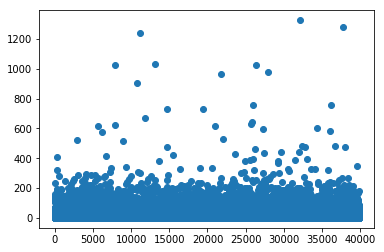

In [47]:
import matplotlib.pyplot as plt
plt.scatter(range(len(count_mentions)), count_mentions)
plt.show()

In [48]:
import pickle
with open("mentions_tweets_dict.pkl","wb") as f:
    pickle.dump(mentionsGraph, f, pickle.HIGHEST_PROTOCOL)

In [52]:
import json
json_data = {}
links = []

In [67]:
nodes = set(mentionsGraph.keys())

In [167]:
# gather all links
json_links_list = []
json_nodes_list = []
pos = 0
userid=1
nodes = []
for key, value in mentionsGraph.iteritems():
    if len(value) == 50:
        json_nodes_list.append({"name":str(key)})
        key_pos=pos
        pos += 1
        for item in value:
            nodes.append(item)
            json_nodes_list.append({"name":str(item)})
            json_links_list.append({"source":key_pos, "target":pos})
            pos += 1
        userid +=1
        if userid > 1000:
            break

In [163]:
data = {"nodes": json_nodes_list, "links": json_links_list}

In [164]:
import os
path = '/home/alexandra/Desktop/graphFile-mentions-minimal.txt'
os.remove(path)
with open(path, 'w') as outfile:
    json.dump(data, outfile)

In [84]:
jsondata

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [166]:
json_nodes_list[:5]

[{'name': '60175536'},
 {'name': 'lalaiueo'},
 {'name': 'daisyamanda'},
 {'name': 'lintanggg'},
 {'name': 'laulithamayang'}]

In [112]:
len(json_links_list)

0

In [171]:
with open ("mentioned_user_names.txt","wb") as f:
    pickle.dump(nodes, f, pickle.HIGHEST_PROTOCOL)

In [173]:
nodes[0]

'lalaiueo'